<h1> Main Idea</h1>

**Bagging**, **random forests**, and **boosting** involves producing multiple trees which are then combined to yield a single consensus prediction. We will see that combining a large number of trees can often result in dramatic improvements in prediction accuracy, at the expense of some loss in interpretation.

In [1]:
import pydot
from IPython.display import Image
from six import StringIO  
from sklearn.tree import export_graphviz

# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    (graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

```
Boston.csv

A data frame containing 506 observations on housing values of suburbs in Boston and the following 14 variables:

crim    per capita crime rate by town.
zn      proportion of residential land zoned for lots over 25,000 sq.ft.
indus   proportion of non-retail business acres per town.
chas    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
nox     nitrogen oxides concentration (parts per 10 million).
rm      average number of rooms per dwelling.
age     proportion of owner-occupied units built prior to 1940.boxcox 21
dis     weighted mean of distances to five Boston employment centres.
rad     index of accessibility to radial highways.
tax     full-value property-tax rate per $10,000.
ptratio pupil-teacher ratio by town.
black   1000(Bk − 0.63)2 where Bk is the proportion of blacks by town.
lstat   lower status of the population (percent).
medv    median value of owner-occupied homes in $1000s
```

In [2]:
import pandas as pd
boston_df = pd.read_csv('https://r-data.pmagunia.com/system/files/datasets/dataset-70319.csv')

In [3]:
X = boston_df.drop('medv', axis=1)
y = boston_df.medv

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2>Bagging</h2>

Recall that given a set of $n$ independent observations $Z_{1}, \ldots, Z_{n}$, each with variance $\sigma^{2}$, the variance of the mean $\bar{Z}$ of the observations is given by $\sigma^{2} / n .$ In other words, averaging a set of observations reduces variance. Hence a natural way to reduce the variance and hence increase the prediction accuracy of a statistical learning method is to take many training sets from the population, build a separate prediction model using each training set, and average the resulting predictions. In other words, we could calculate $\hat{f}^{1}(x), \hat{f}^{2}(x), \ldots, \hat{f}^{B}(x)$ using $B$ separate training sets, and average them in order to obtain a single low-variance statistical learning model, given by
$$
\hat{f}_{\text {avg }}(x)=\frac{1}{B} \sum_{b=1}^{B} \hat{f}^{b}(x)
$$
Of course, this is not practical because we generally do not have access to multiple training sets. Instead, we can bootstrap, by taking repeated samples from the (single) training data set. In this approach we generate $B$ different bootstrapped training data sets. We then train our method on the $b$ th bootstrapped training set in order to get $\hat{f}^{* b}(x)$, and finally average all the predictions, to obtain
$$
\hat{f}_{\mathrm{bag}}(x)=\frac{1}{B} \sum_{b=1}^{B} \hat{f}^{* b}(x)
$$
This is called bagging.

In [4]:
import ipywidgets as widgets
import IPython.display as display
## Read images from file (because this is binary, maybe you can find how to use ByteIO) but this is more easy
img1 = open('img/bootstrap.png', 'rb').read()
img2 = open('img/bagging.png', 'rb').read()
## Create image widgets. You can use layout of ipywidgets only with widgets.
## Set image variable, image format and dimension.
wi1 = widgets.Image(value=img1, format='png', width=500, height=600)
wi2 = widgets.Image(value=img2, format='png', width=500, height=600)
## Side by side thanks to HBox widgets
sidebyside = widgets.HBox([wi1, wi2])
## Finally, show.
display.display(sidebyside)

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

regbag = BaggingRegressor(base_estimator=DecisionTreeRegressor(),oob_score=True,
                          n_estimators=100, random_state=42).fit(X_train, y_train)

In [6]:
## Read images from file (because this is binary, maybe you can find how to use ByteIO) but this is more easy
img3 = open('img/bagging_prediction.png', 'rb').read()
## Create image widgets. You can use layout of ipywidgets only with widgets.
## Set image variable, image format and dimension.
wi3 = widgets.Image(value=img3, format='png', width=400, height=500)
## Side by side thanks to HBox widgets
pic = widgets.HBox([wi3])
## Finally, show.
display.display(pic)

Text(0, 0.5, 'y_test')

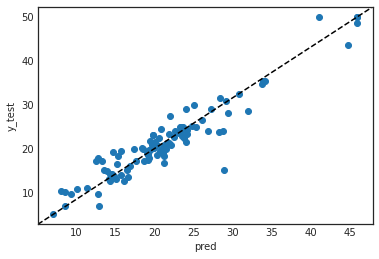

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

pred = regbag.predict(X_test)

%matplotlib inline
plt.style.use('seaborn-white')

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [8]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

8.09091723529412

<h3><em>Out-of-Bag</em> Error Estimation</h3>

Recall that the key to bagging is that trees are repeatedly fit to bootstrapped subsets of the observations. <ins>One can show that on average, each bagged tree makes use of around two-thirds of the observations</ins>:
<blockquote>
If there are $n$ rows in the training data set. Then, the probability of not picking a row in a random draw is

$$
\frac{n-1}{n}
$$
    
Using _sampling-with-replacement_ the probability of not picking $n$ rows in random draws is

$$
\left(\frac{n-1}{n}\right)^n
$$
In the limit as $n\rightarrow\infty$ one has
    
$$
\lim_{n\rightarrow\infty}\left(1-\frac{1}{n}\right)^n=\exp{(-1)}=0.368
$$
</blockquote>

The remaining one-third of the observations not used to fit a given bagged tree are referred to as the __out-of-bag (OOB)__ observations.

In [9]:
## Read images from file (because this is binary, maybe you can find how to use ByteIO) but this is more easy
img4 = open('img/OOB_evaluation.png', 'rb').read()
## Create image widgets. You can use layout of ipywidgets only with widgets.
## Set image variable, image format and dimension.
wi4 = widgets.Image(value=img4, format='png', width=600, height=700)
## Side by side thanks to HBox widgets
pic = widgets.HBox([wi4])
## Finally, show.
display.display(pic)

We can predict the response for the $i$th observation using each of the trees in which that observation was OOB. This will yield around $B/3$ predictions for the $i$th observation. In order to obtain a single prediction for the $i$th observation:

👉🏼 Regression: We can average these predicted responses

👉🏼 Classification: We can take a majority vote.

This leads to a single OOB prediction for the $i$th observation.

📝 An OOB prediction can be obtained in this way for each of the $n$ observations and then the `r2_score` can be calculated for the entire training set.

In [10]:
print("oob score is: ", regbag.oob_score_) # The oob score is an estimate of the r2 score of the ensemble regressor

oob score is:  0.837514044174114


<h2>Random Forest</h2>

Random forests provide an improvement over bagged trees by way of a small tweak that decorrelates the trees. As in bagging, we build a number of decision trees on bootstrapped training samples. But when building these decision trees, <ins>each time a split in a tree is considered, a random sample of $m$ predictors is chosen as split candidates from the full set of $p$ predictors</ins>.

👉🏼 The split is allowed to use only one of those $m$ predictors.

👉🏼 A fresh sample of $m$ predictors is taken at each split, and typically we choose $m \approx \sqrt{p}$ - that is, the number of predictors considered at each split is approximately equal to the square root of the total number of predictors.

In [11]:
from numpy import sqrt as sqrt
# There are 13 features in the dataset
print(X.shape)
print(sqrt(X.shape[1]))

(506, 13)
3.605551275463989


In [12]:
# Random Forest: using 4 features
from sklearn.ensemble import RandomForestRegressor
regrf = RandomForestRegressor(max_features=4, random_state=42)
regrf.fit(X_train, y_train)

RandomForestRegressor(max_features=4, random_state=42)

📝 The main difference between bagging and random forests is the choice of predictor subset size $m$. For instance, if a random forest is built using
$m = p$, then this amounts simply to bagging.

Text(0, 0.5, 'y_test')

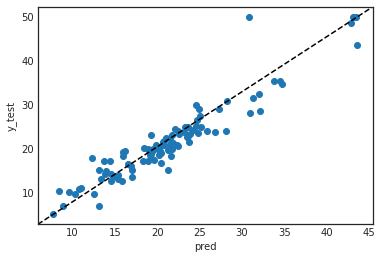

In [13]:
pred = regrf.predict(X_test)

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [14]:
mean_squared_error(y_test, pred)

9.133698931372532

<h3>Variance Importance Measures</h3>

Although the collection of trees is much more difficult to interpret than a single tree, one can obtain an overall summary of the importance of each predictor using the $RSS$ (for regression trees) or the <em>Gini index</em> (for classification trees). In the case of regression trees, we can record the total amount that the $RSS$ is decreased due to splits over a given predictor, averaged over all $B$ trees. A large value indicates an important predictor. Similarly, in the context of classification trees, we can add up the total amount that the <em>Gini index</em> is decreased by splits over a given predictor, averaged over all $B$ trees.

In [15]:
# Random forests: using 4 features
regrf2 = RandomForestRegressor(max_features=4, random_state=42)
regrf2.fit(X_train, y_train)

RandomForestRegressor(max_features=4, random_state=42)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


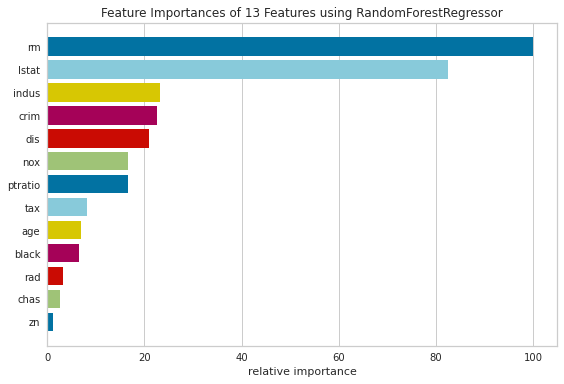

<AxesSubplot:title={'center':'Feature Importances of 13 Features using RandomForestRegressor'}, xlabel='relative importance'>

In [16]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(regrf2)
viz.fit(X_train, y_train)
viz.show()

The variables with the largest _mean_ decrease in $RSS$ are `rm` and `lstat`.

<h2>Boosting</h2>

Recall that bagging involves creating multiple copies of the original training data set using the bootstrap, fitting a separate decision tree to each
copy, and then combining all of the trees in order to create a single predictive model. Notably, each tree is built on a bootstrap data set, independent of the other trees. Boosting works in a similar way, except that the <ins>trees are grown sequentially</ins>: each tree is grown using information from previously grown trees.

🔔 Boosting does not involve bootstrap sampling; instead each tree is fit on a modified version of the original data set.

***
**Algorithm**: <ins>_Boosting_ for Regression Trees</ins>

1. Set $\hat{f}(x)=0$ and $r_{i}=y_{i}$ for all $i$ in the training set.
2. For $b=1,2, \ldots, B$(=`n_estimators`), repeat:\
(a) Fit a tree $\hat{f}^{b}$ with $d$ splits (`max_leaf_nodes=`$d+1$ terminal nodes ) to the training data $(X, r)$.\
(b) Update $\hat{f}$ by adding in a shrunken version ($\lambda$=`learning_rate`) of the new tree:
$$
\hat{f}(x) \leftarrow \hat{f}(x)+\lambda \hat{f}^{b}(x)
$$
(c) Update the residuals,
$$
r_{i} \leftarrow r_{i}-\lambda \hat{f}^{b}\left(x_{i}\right)
$$
3. Output the boosted model,
$$
\hat{f}(x)=\sum_{b=1}^{B} \lambda \hat{f}^{b}(x) .
$$
***

📝 The number $d$ of splits in each tree controls the complexity of the boosted ensemble. Often $d=1$ works well, in which case each tree is a _stump_, consisting of a single split (`max_depth=1`). In this case, the boosted ensemble is fitting an additive model, since each term involves only a single variable.

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
regb = GradientBoostingRegressor(n_estimators=500,
                                 learning_rate=0.01,
                                 max_leaf_nodes=10,
                                 random_state=42)
regb.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_leaf_nodes=10,
                          n_estimators=500, random_state=42)

In [18]:
mean_squared_error(y_train, regb.predict(X_train))

3.3207461968959273

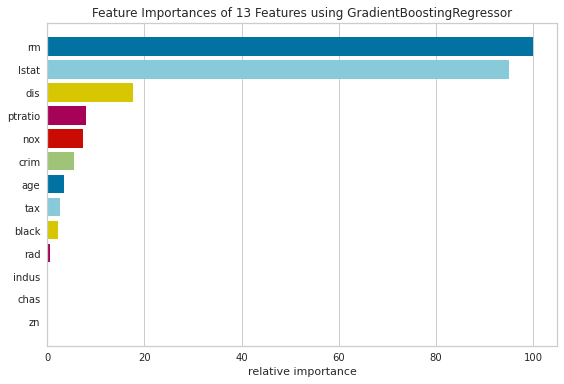

<AxesSubplot:title={'center':'Feature Importances of 13 Features using GradientBoostingRegressor'}, xlabel='relative importance'>

In [19]:
viz = FeatureImportances(regb)
viz.fit(X_train, y_train)
viz.show()

In [20]:
mean_squared_error(y_test, regb.predict(X_test))

7.910704913755907